<a href="https://colab.research.google.com/github/szalmaf/Wealth-simulation/blob/master/Bernoulli_wealth_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Wealth simulation


Based on Ole Peters' TEDx lecture:
https://www.youtube.com/watch?v=LGqOH3sYmQA

##Ensemble average

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
tf.enable_eager_execution()
tf.version.VERSION

'1.14.0-rc1'

In [0]:
tf.executing_eagerly()

True

In [0]:
gain_factor = 1.5  # Gain 50% on your current wealth
loss_factor = 0.6  # Lose 40% on your current wealth
n_sample = 1000000  # number of samples in the ensemble
n_time = 60  # number of time steps
w0 = 100.  # initial wealth

In [0]:
def rescale_bernoulli_to_gain_loss(gain, loss, tensor):
  y = gain - loss
  x = loss/y
  return (tensor + x) * y
  
mean_t = np.zeros(n_time + 1)
std_t = np.zeros(n_time + 1)
mean_t[0] = w0
std_t[0] = 0
wt = tf.ones(n_sample) * w0


for t in range(n_time):
  rndw_aux = tfp.distributions.Bernoulli(probs=0.5,dtype=tf.float32).sample(n_sample)
  rndw = rescale_bernoulli_to_gain_loss(gain_factor, loss_factor, rndw_aux)
  wt = wt * rndw
  mean_t[t + 1] = tf.reduce_sum(wt) / n_sample
  std_t[t + 1] = np.std(wt)

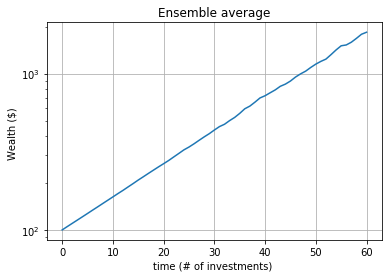

In [0]:
fig, ax = plt.subplots()
ax.semilogy(range(n_time + 1), mean_t)
# plt.semilogy
ax.set(xlabel='time (# of investments) ', ylabel='Wealth ($) ',
       title='Ensemble average')
ax.grid()

#fig.savefig("ensemble_average.png")
plt.show()

##Time average


In [0]:
gain_factor = 1.5  # Gain 50% on your current wealth
loss_factor = 0.6  # Lose 40% on your current wealth
n_time = 60*24*2  # number of time steps (60 = 1 hour, 60*24 = 1 day, 60*24*7 = 1 week, 60*24*365 = 1 year)
w0 = 100.  # initial wealth

In [0]:
def rescale_bernoulli_to_gain_loss(gain, loss, tensor):
  y = gain - loss
  x = loss/y
  return (tensor + x) * y

wt = np.ones(n_time + 1)

rndw_aux = tfp.distributions.Bernoulli(probs=0.5,dtype=tf.float32).sample(n_time)
rndw = rescale_bernoulli_to_gain_loss(gain_factor, loss_factor, rndw_aux)
wt[0] = w0
wt[1:] = w0 * tf.cumprod(rndw)


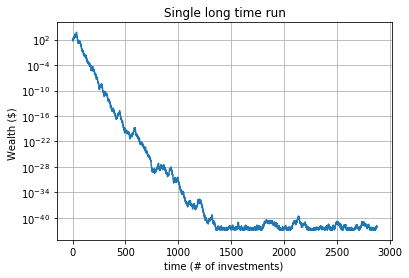

In [0]:
fig, ax = plt.subplots()
ax.semilogy(range(n_time + 1), wt)
# plt.semilogy
ax.set(xlabel='time (# of investments) ', ylabel='Wealth ($) ',
       title='Single long time run')
ax.grid()

#fig.savefig("time_average.png")
plt.show()